In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

#importing file
dataset=pd.read_csv(r"C:\Users\ADMIN\Desktop\faith doc\Airplane Crashes Analysis.csv")
#checking for missing values
print(dataset.isnull().sum())
#Filling missing 'Operator' values with 'Unknown'
dataset['Operator'].fillna('Unknown', inplace=True)
dataset.describe()
print(dataset.head())


Date              0
Time           1512
Location          4
Operator         10
Flight #       3669
               ... 
Unnamed: 64    4998
Unnamed: 65    4998
Unnamed: 66    4998
Unnamed: 67    4998
Unnamed: 68    4997
Length: 69, dtype: int64
         Date   Time                            Location  \
0   9/17/1908  17:18                 Fort Myer, Virginia   
1  09/07/1909    NaN             Juvisy-sur-Orge, France   
2  07/12/1912  06:30           Atlantic City, New Jersey   
3  08/06/1913    NaN  Victoria, British Columbia, Canada   
4  09/09/1913  18:30                  Over the North Sea   

                 Operator Flight #          Route                 AC Type  \
0    Military - U.S. Army      NaN  Demonstration        Wright Flyer III   
1                 Unknown      NaN       Air show          Wright Byplane   
2    Military - U.S. Navy      NaN    Test flight               Dirigible   
3                 Private      NaN            NaN        Curtiss seaplane   
4  Milita

In [3]:
#1. Summarizing incidents and fatalities by operator
summary = dataset.groupby('Operator').agg(
    Incidents=('Date', 'count'),
    Total_Aboard=('Aboard', 'sum'),
    Total_Fatalities=('Fatalities', 'sum')
).reset_index()

# Calculating fatality rate
summary['Fatality_Rate'] = summary['Total_Fatalities'] / summary['Total_Aboard']

# Sorting by fatality rate and number of incidents
summary.sort_values(by=['Fatality_Rate', 'Incidents'], ascending=[False, False], inplace=True)
print(summary)

                                    Operator  Incidents  Total_Aboard  \
41                           Adastra Airways          1           0.0   
53                                Aero Asahi          1           0.0   
1393                          Military - TAM          1           0.0   
1643                                Piedmont          1           0.0   
1769        SAVG (S.A. Viacao Gaucha, ) SAVG          1           0.0   
...                                      ...        ...           ...   
1715  Regional Compagnie Aerienne Europeenne          1          54.0   
2075           Transcontinental &Western Air          1          11.0   
2122                              US Airways          1         155.0   
2227                      Western Helicopter          1           1.0   
843                                   Fokker          1           0.0   

      Total_Fatalities  Fatality_Rate  
41                 6.0            inf  
53                10.0            inf  
139

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


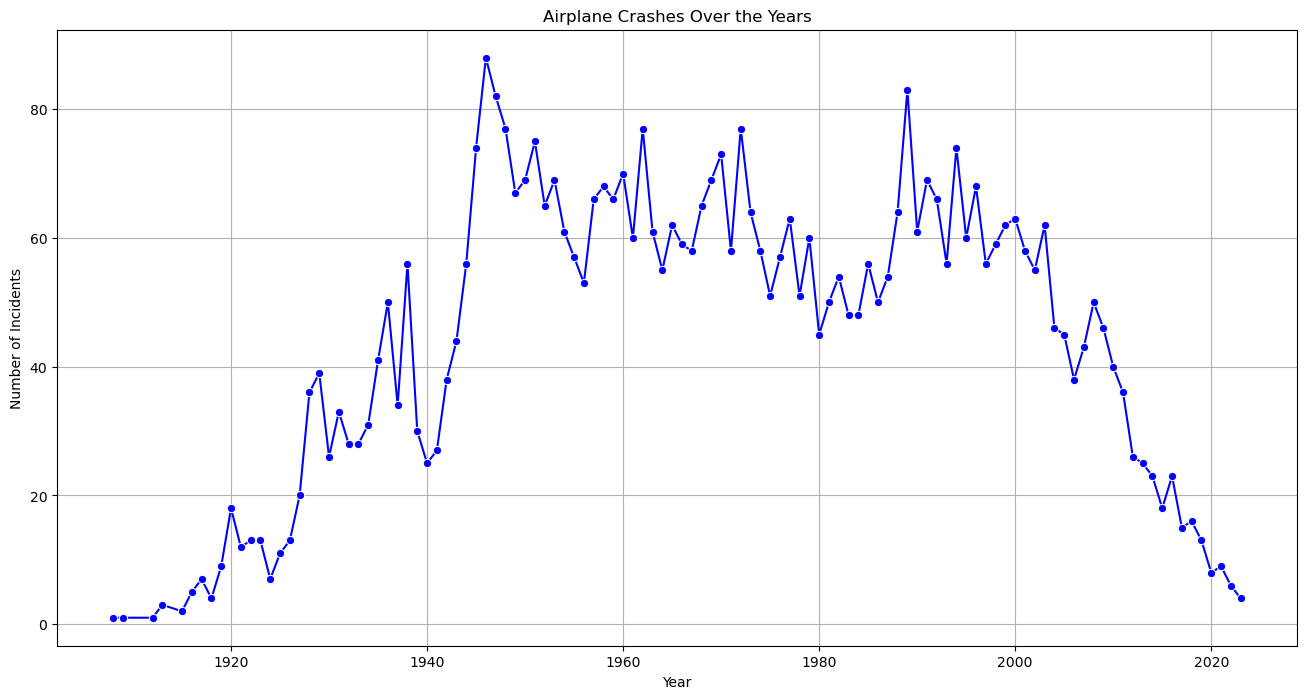

In [4]:
import pandas as pd
dataset=pd.read_csv(r"C:\Users\ADMIN\Desktop\faith doc\Airplane Crashes Analysis.csv")
#2.Filling missing 'Operator' values with 'Unknown'
dataset['Operator'].fillna('Unknown', inplace=True)

#extracting date from data
dataset['Date'] = pd.to_datetime(dataset['Date'])
#Extract year from the date
dataset['year'] = dataset['Date'].dt.year


# Count incidents per year
incidents_per_year =dataset.groupby('year').size()

# Plotting the temporal trends
plt.figure(figsize=(16, 8))
sns.lineplot(data=incidents_per_year, marker='o', color='blue')
plt.title('Airplane Crashes Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()

In [5]:
#3..Calculating incident rate per million flights
summary['Incident_Rate_per_Million_Flights'] = (summary['Incidents'] / summary['Total_Aboard']) * 1e6

# Sorting by incident rate
summary.sort_values(by='Incident_Rate_per_Million_Flights', ascending=False, inplace=True)

# Displaying the summary
print(summary)

                                          Operator  Incidents  Total_Aboard  \
41                                 Adastra Airways          1           0.0   
1963                                    Syrian Air          1           0.0   
53                                      Aero Asahi          1           0.0   
2242            Wingfoot Air Express Goodyear Tire          1           0.0   
843                                         Fokker          1           0.0   
...                                            ...        ...           ...   
1314  Military - Islamic Revolution's Guards Corps          1         275.0   
785                                       Emirates          1         300.0   
283                                    Air Transat          1         304.0   
1807  Saudi Arabian Airlines / Kazakhstan Airlines          1         349.0   
1596              Pan American World Airways / KLM          1         644.0   

      Total_Fatalities  Fatality_Rate  Incident_Rat

In [6]:
#4. Analyzing involvement of specific aircraft types
aircraft_involvement = dataset.groupby('AC Type').size().reset_index(name='Incidents')

# Analyzing relationship between aircraft registration and crash occurrences
registration_crash_relationship = dataset.groupby('Registration').size().reset_index(name='Crash_Count')

# Displaying the results
print("Involvement of Specific Aircraft Types in Incidents:")
print(aircraft_involvement)
print("\nRelationship Between Aircraft Registration and Crash Occurrences:")
print(registration_crash_relationship)

Involvement of Specific Aircraft Types in Incidents:
                                     AC Type  Incidents
0                      \tBoeing 737-8KN (WL)          1
1                             \tCurtiss C-46          1
2        \tEurocopter EC225LP Super Puma M2+          1
3     \tFairchild C-119C-15-FA Flying Boxcar          1
4                          \tIlyushin IL-14M          1
...                                      ...        ...
2458                   de Havilland Dragon 1          1
2459           de Hvilland 89A Dragon Rapide          1
2460           de havilland 89 Dragon Rapide          1
2461      de havilland Canada Twin Otter 200          1
2462                       deHavilland DH-86          1

[2463 rows x 2 columns]

Relationship Between Aircraft Registration and Crash Occurrences:
        Registration  Crash_Count
0     \t BNMAU-10208            1
1      \t CCCP-46248            1
2      \t CCCP-52056            1
3      \t CCCP-52091            1
4      \t CCC

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

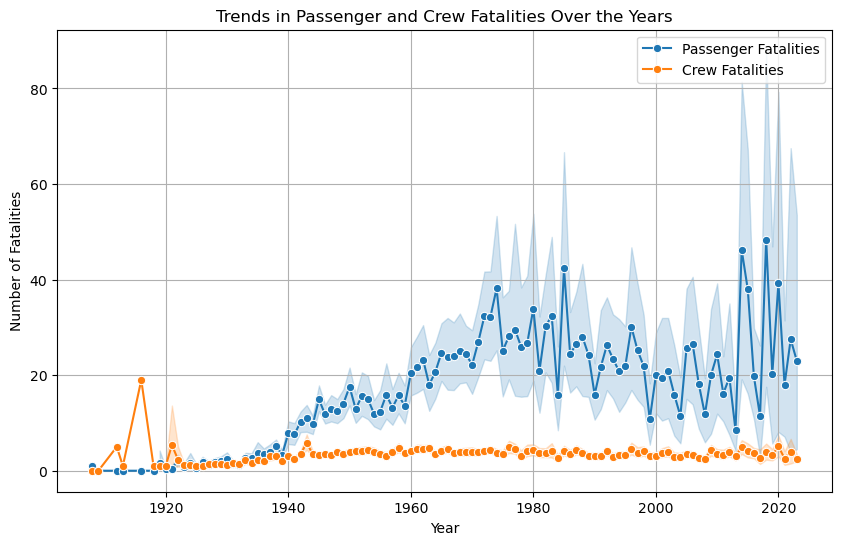

In [7]:
#extracting date from data
dataset['Date'] = pd.to_datetime(dataset['Date'])
#Extract year from the date
dataset['year'] = dataset['Date'].dt.year
#Drop rows with missing fatalities data
dataset.dropna(subset=['Fatalities Passangers', 'Fatalities Crew'], inplace=True)
#Calculate total fatalities
dataset['Total Fatalities'] = dataset['Fatalities Passangers'] + dataset['Fatalities Crew']

# Plotting trends in passenger and crew fatalities over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=dataset, x=dataset.year, y=dataset['Fatalities Passangers'], marker='o', label='Passenger Fatalities')
sns.lineplot(data=dataset, x=dataset.year, y=dataset['Fatalities Crew'], marker='o', label='Crew Fatalities')
plt.title('Trends in Passenger and Crew Fatalities Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# 6.Drop rows with missing 'Route' data

dataset.dropna(subset=['Route'], inplace=True)

# Analyze incident patterns on specific flight routes
route_incidents = dataset.groupby('Route').size().reset_index(name='Incidents')
route_incidents.sort_values(by='Incidents', ascending=False, inplace=True)

# Displaying the results
print("Incident Patterns on Specific Flight Routes:")
print(route_incidents)




Incident Patterns on Specific Flight Routes:
                                    Route  Incidents
3519                             Training         89
3217                          Sightseeing         31
3448                          Test flight         22
3134           Sao Paulo - Rio de Janeiro          7
3446                                 Test          6
...                                   ...        ...
1289             Greenville - Baton Rouge          1
1290                   Griffin - Americus          1
1291  Griffith-Merrill, IN - Somerset, KY          1
1292            Groton, CT - New York, NY          1
3767          thampton - Lisbon - Funchal          1

[3768 rows x 2 columns]


In [ ]:
#i tried the geospatal analysis their were so many errors but i promise i will keep trying untill i get something.
from geopandas.tools import sjoin
from geopandas import GeoDataFrame
import folium
from folium.plugins import HeatMap
import sklearn as skl
from geopy.geocoders import Nominatim
import pandas as pd

dataset=pd.read_csv(r"C:\Users\ADMIN\Desktop\faith doc\Airplane Crashes Analysis.csv")

# Parsing latitude and longitude from Location using geopy

geolocator = Nominatim(user_agent="Airplane Crashes Analysis")

def get_coordinates(location):
    try:
        location = geolocator.geocode(location)
        return location.latitude, location.longitude
    except:
        return None, None

dataset['Latitude'], dataset['Longitude'] = zip(*dataset['Location'].apply(get_coordinates))

# Removing rows with missing coordinates
dataset = dataset.dropna(subset=['Latitude','Longitude'])

# Plotting heatmap using folium

map_center = [dataset['Latitude'].mean(), dataset['Longitude'].mean()]
crash_map = folium.Map(location=map_center, zoom_start=2)

# Adding heat layer to the map
heat_data = [[row['Latitude'], row['Longitude']] for index, row in dataset.iterrows()]
HeatMap(heat_data).add_to(crash_map)

# Displaying the map
crash_map.save('crash_heatmap.html')
print('crash_heatmap.html')